**0-准备**

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 修改当前路径
path=os.getcwd()
path_p=os.path.dirname(path)
os.chdir(path_p)

In [27]:
os.getcwd()

'c:\\Users\\wejia43\\OneDrive - IKEA\\Desktop\\WDG'

导入data并展示数据前五行

In [ ]:
data=pd.read_csv('EDA Learning/input/train.csv')
data.head()

os.chdir(path)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1-空值处理**

空值检查

In [ ]:
data.isnull().sum() #checking for total null values

空值补充  

1.非数值型

In [10]:
# 求众数 
data['Embarked'].mode()

0    S
dtype: object

In [11]:
# 用众数填充
data['Embarked'].fillna('S',inplace=True)

2.数值型

In [13]:
# 求平均数
data['Age'].mean()
# 求中位数
data['Age'].median()

28.0

In [14]:
# 选择一个填充
data.loc[data.Age.isnull(),'Age']=28
# data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46  # 如有并行条件

**2-因变量数据可视化**

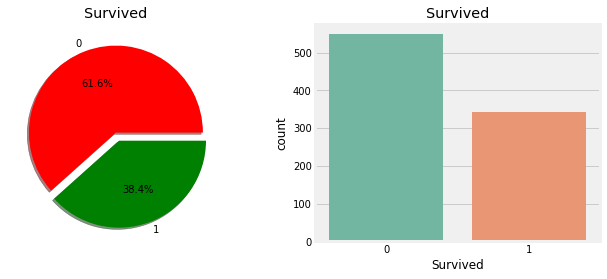

In [15]:
# 对Survived进行可视化
f, ax = plt.subplots(1, 2, figsize=(10, 4)) # 1行2列
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True, colors=['red', 'green'])
ax[0].set_title('Survived') # 标题
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1], palette='Set2')
ax[1].set_title('Survived') # 标题
plt.show()

**3-因子分析**  
各变量和Survive的关系

1.Sex：Categorical Feature分类变量

In [16]:
# sex和因变量的关系
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

可视化 分布图+关联关系图

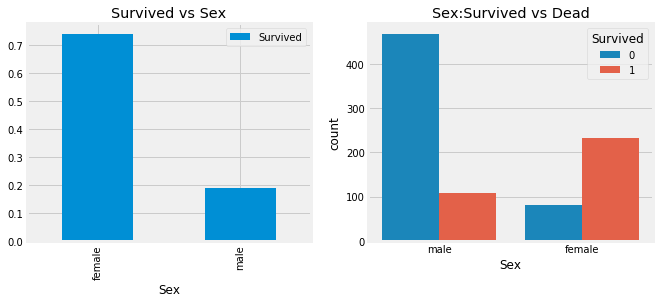

In [20]:
f,ax=plt.subplots(1,2,figsize=(10,4)) # 1行2列
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) # 0-1变量均值代表存活率
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

2.Pclass：Ordinal Feature分级变量

In [18]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


可视化 分布图+关联关系图

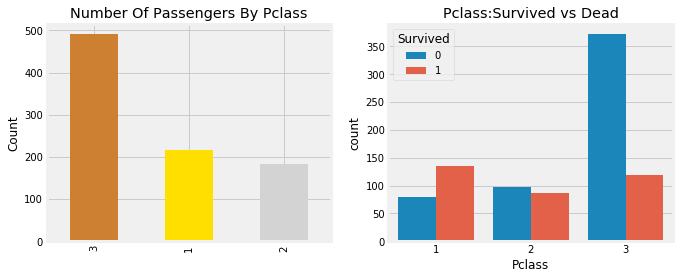

In [19]:
f,ax=plt.subplots(1,2,figsize=(10,4)) # 1行2列
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0]) # 分布
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1]) #分布
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

3.如需两个变量结合

In [21]:
#Sex and Pclass Together
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

可视化

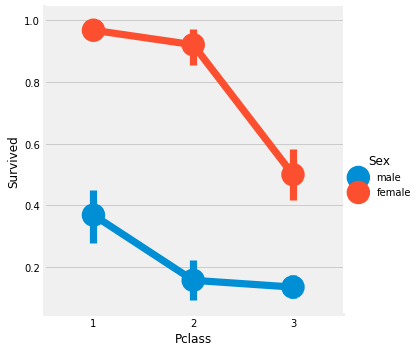

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

4.对连续变量的分析 Continous Feature

In [23]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.36158249158249 Years


琴图可视化 12为联合自变量 需包含一个连续变量 hue为因变量

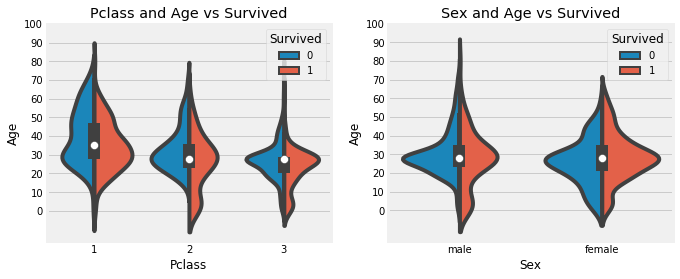

In [24]:
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

频数分布直方图 按因变量取值分别展开

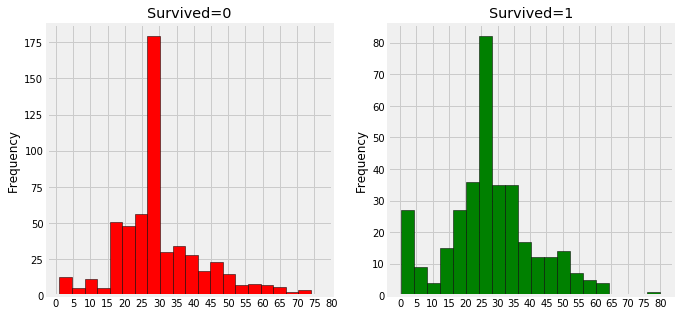

In [25]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()